In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = sns.load_dataset('mpg')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [5]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Let's investigate whether we think the cylinder of the cars are related

We need to look at the counts of our data.

In [6]:
pd.crosstab(df['cylinders'], df['origin'])

origin,europe,japan,usa
cylinders,,,
3,0,4,0
4,63,69,72
5,3,0,0
6,4,6,74
8,0,0,103


In [7]:
#check 
usa = df['origin'] == 'usa'
japan = df['origin'] == 'japan'
europe = df['origin'] == 'europe'
print(f'total # cars made in usa = {df[usa].shape[0]}')
print(f'total # cars made in japan = {df[japan].shape[0]}')
print(f'total # cars made in europe = {df[europe].shape[0]}')

total # cars made in usa = 249
total # cars made in japan = 79
total # cars made in europe = 70


In [8]:
three = df['cylinders'] == 3
four = df['cylinders'] == 4
five = df['cylinders'] == 5
six = df['cylinders'] == 6
eight = df['cylinders'] == 8

In [9]:
print(df[europe & four].shape[0])
print(df[japan & four].shape[0])
print(df[usa & four].shape[0])

63
69
72


## Now let's perform the Chi-squared Test for Independence

Null hypothesis is that the number of cylinder and the origin where the car is made are independent.

Alternative hypothesis is that they are NOT independent

Before we see the test, what do you think the answer is??

In [10]:
observed = pd.crosstab(df['cylinders'], df['origin'])

In [11]:
chi2, p, dof, expected = chi2_contingency(observed.values)
print(f'The test statistic is {chi2}. \nThe p value is {p}.')

The test statistic is 180.10177141976715. 
The p value is 9.800693325588298e-35.


So, reject the null hypothesis

In [12]:
sns.get_dataset_names()

/Users/seanreed1/miniconda3/lib/python3.7/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /Users/seanreed1/miniconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

## Penguins

In [13]:
penguins = sns.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
penguins['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [15]:
penguins.loc[:,'is_male'] = penguins['sex'] == 'MALE'

In [16]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   is_male            344 non-null    bool   
dtypes: bool(1), float64(4), object(3)
memory usage: 19.3+ KB


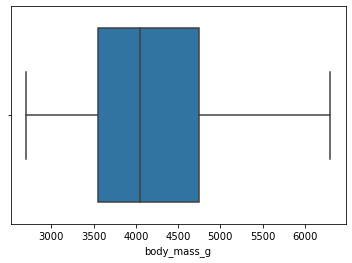

In [17]:
sns.boxplot(penguins['body_mass_g'])

In [18]:
penguins.loc[:,'is_over_4000_g'] = penguins['body_mass_g'] > 4000

In [19]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   is_male            344 non-null    bool   
 8   is_over_4000_g     344 non-null    bool   
dtypes: bool(2), float64(4), object(3)
memory usage: 19.6+ KB


In [20]:
obs = pd.crosstab(penguins['is_male'], penguins['is_over_4000_g'])
obs

is_over_4000_g,False,True
is_male,,
False,113,63
True,59,109


Looking at the table above, if we do a test for independence, would we reject or fail to reject the null hypothesis that being male and being over 4000g are independent in the population of penguins?

In [21]:
chi2, p, dof, expected = chi2_contingency(obs.values)

print(f'The test statistic is {chi2}. \nThe p value is {p}.')

The test statistic is 27.93371212121212. 
The p value is 1.2554328660237964e-07.


So, reject the null hypothesis

## Titanic

In [22]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [23]:
pd.crosstab(titanic['survived'], titanic['pclass'])

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


In [24]:
pd.crosstab(titanic['survived'], titanic['adult_male'])

adult_male,False,True
survived,,
0,100,449
1,254,88


In [25]:
embarked  = pd.crosstab(titanic['survived'], titanic['embarked'])
embarked

embarked,C,Q,S
survived,,,
0,75,47,427
1,93,30,217


In [26]:
chi2, p, dof, expected = chi2_contingency(embarked.values)

print(f'The test statistic is {chi2}. \nThe p value is {p}.')

The test statistic is 26.48914983923762. 
The p value is 1.769922284120912e-06.
